## Observations and Insights 

Three observations from the data for the mouse data study below:

1.) Infubinal and Ceftamin had the highest overall tumor volume at the end of the 45-day study while Capomulin and Ramucane had the lowest tumor volume at the end of the 45 days of the study.

2.) The r-squared is: 0.7686 which shows a positive correlation between the weight of the mouse and the volume of tumor. This would mean that a higher weight shows a higher volume of tumor in the mouse.

3.) Mouse b128 which has Capomulin administered had an initial drop in tumor but then that rose again. Near the end of the study, the tumor volume was dropping again. This mouse also had two tumor sites at the end of the 45 days and a high weight due to the tumors. At the end of the 45 days, according to the graph, the tumor volume was dropping steadily. A longer study could show a constant decrease of the tumors when administering Capomulin.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
# Display the data table for preview
mouse_study_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
mouse_study_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice.

mouse_study_df['Mouse ID'].count()


1893

In [4]:
mouse_study_df['Mouse ID'].count()
mouse_study_df.duplicated().sum()

1

In [5]:
mouse_study_df[['Mouse ID', 'Timepoint']].drop_duplicates()

,Mouse ID,Timepoint
0,b128,0
1,f932,0
2,g107,0
3,a457,0
4,c819,0
...,...,...
1888,r944,45
1889,u364,45
1890,p438,45
1891,x773,45


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_dup=mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_study_dup

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df.loc[mouse_study_df.duplicated(), :]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_study = mouse_study_df[mouse_study_df["Mouse ID"].isin(mouse_study_dup)==False]
clean_mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study["Mouse ID"].nunique()



248

In [10]:
clean_mouse_study_df = clean_mouse_study
clean_mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

c_mouse_study_df_group=clean_mouse_study.groupby(['Drug Regimen'])

c_mouse_study_mean=c_mouse_study_df_group['Tumor Volume (mm3)'].mean()
c_mouse_study_median=c_mouse_study_df_group['Tumor Volume (mm3)'].median()
c_mouse_study_var=c_mouse_study_df_group['Tumor Volume (mm3)'].var()
c_mouse_study_std=c_mouse_study_df_group['Tumor Volume (mm3)'].std()
c_mouse_study_sem=c_mouse_study_df_group['Tumor Volume (mm3)'].sem()

summary_mouse_study = pd.DataFrame([c_mouse_study_mean, c_mouse_study_median, c_mouse_study_var, c_mouse_study_std,c_mouse_study_sem])

c_mouse_sum_stats= summary_mouse_study.T

c_mouse_sum_stats.columns = ['c_mouse_study_mean','c_mouse_study_median','c_mouse_study_var', 'c_mouse_study_std','c_mouse_study_sem']

c_mouse_sum_stats2=c_mouse_sum_stats.rename(columns = {"c_mouse_study_mean":"Mean Tumor Volume (mm3)","c_mouse_study_median":"Median Tumor Volume (mm3)","c_mouse_study_var":"Variance Tumor Volume (mm3)", "c_mouse_study_std":"Standard Deviation Tumor Volume (mm3)","c_mouse_study_sem":"SEM Tumor Volume (mm3)"}, inplace = False)

#overall summary per drug
c_mouse_sum_stats2.head(20)

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mouse_study_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']}
                                            ).rename(columns={'mean':'Mean', 'median':'Median', 
                                                              'var':'Variance', 'std':'Standard Deviation', 'sem':'SEM'})


Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.322552  50.854632  42.351070           6.507770   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

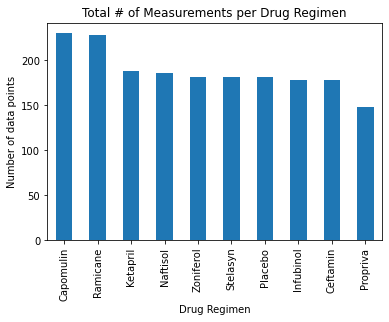

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measure= clean_mouse_study ["Drug Regimen"].value_counts()
total_measure.plot(kind="bar", figsize=(6,4))

# Set a title for the chart
plt.title("Total # of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of data points")
plt.show()
plt.tight_layout()


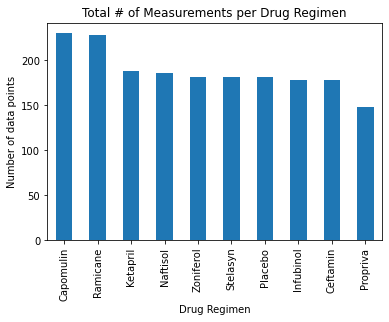

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

count_chart = total_measure.plot(kind='bar')

# Set the xlabel and ylabel using class methods

count_chart.set_title("Total # of Measurements per Drug Regimen")
count_chart.set_xlabel("Drug Regimen", rotation="horizontal")
count_chart.set_ylabel("Number of data points")

plt.show()
plt.tight_layout()



<AxesSubplot:title={'center':'Distribution of Male vs Female Mice'}, ylabel='Sex'>

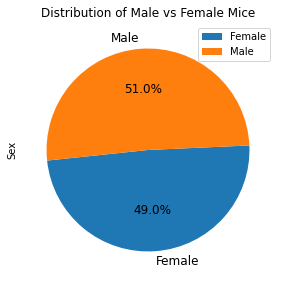

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_mouse_study.groupby('Sex')
gender_qty = gender["Sex"].count()

plt.figure(figsize=(10,10))
ax1 = plt.subplot(121, aspect = 'equal')
gender_qty.plot(kind='pie', title="Distribution of Male vs Female Mice", y = "Quantity", ax=ax1, autopct = '%1.1f%%',
              startangle = 186, shadow = False, legend = True, fontsize = 12)


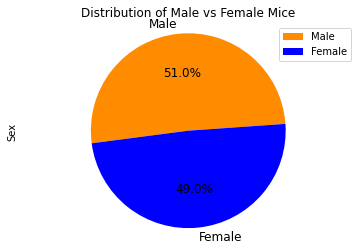

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("Distribution of female versus male mice")

gender = clean_mouse_study["Sex"].value_counts()

#Labels 
labels = ["Male", "Female"]

colors=["DarkOrange", "Blue"]
# Define counts
counts = np.array(gender)

# Matplotlib creates chart as pie
plt.pie(gender, labels=labels, colors=colors, autopct="%1.1f%%",textprops={'size': 'larger'},
        shadow = False, startangle = 364)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of Male vs Female Mice")
plt.ylabel("Sex")

plt.legend()
    
# Display pie plot
plt.show()



## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_vol_mouse_df=clean_mouse_study.groupby('Mouse ID')

# Start by getting the last (greatest) timepoint for each mouse

last_time=clean_mouse_study.groupby(clean_mouse_study['Mouse ID']).max()['Timepoint']

great_timepoint_df=pd.DataFrame(last_time)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_time_df=pd.merge(great_timepoint_df, mouse_study_df, on=('Mouse ID', 'Timepoint'), how="left")
merged_time_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [18]:
# Put treatments into a list for  loop (and later for plot labels)

drugs_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# look for the chosen drugs by slicing throug the merged df
drugs_df = merged_time_df[merged_time_df['Drug Regimen'].isin(drugs_of_interest)]

drugs_df.head(10)

# groupby Mouse ID and quick aggregation
# grab the final tumor volume
# by locating -1 element using lamda anonymous function

final_vol_list = drugs_df.groupby(['Drug Regimen','Mouse ID']).agg(     
        final_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# checking the df
final_vol_list


regroup_df = final_vol_list.stack(level = 0).unstack(level = 0)

regroup_df.head()

# Determine outliers using upper and lower bounds

counter = 0

# Do quartile calculations for each drug
for drug in drugs_of_interest:
    quarters  =  regroup_df[drug].quantile([.25,.5,.75]).round(2)
    lower_quarter  =  quarters[0.25].round(2)
    upper_quarter  =  quarters[0.75].round(2)
    iqr  =  round(upper_quarter-lower_quarter,2)
    lower_bound  =  round(lower_quarter - (1.5*iqr),2)
    upper_bound  =  round(upper_quarter + (1.5*iqr),2)
    
    # print an escape line for each new loop
    if counter == 0:
        print(f'\n')
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lower_quarter}")
    print(f"The upper quartile of {drug} is: {upper_quarter}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quarters[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f'\n')
    counter += 1





Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.


Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.


Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for Infubinol could be outliers.


Ceftamin IQR data is:
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The inte

([<matplotlib.axis.XTick at 0x18c15016ca0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

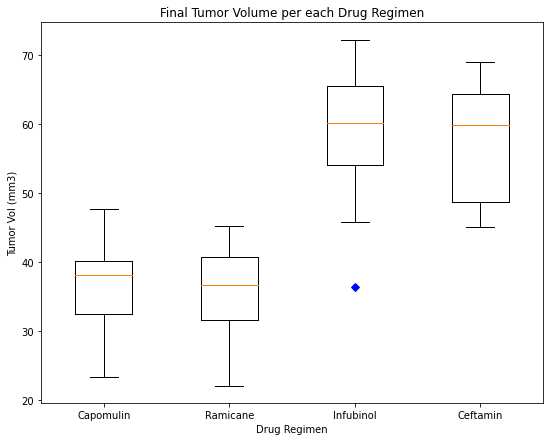

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drugs_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

f_tumor_boxplot_list  = []

# loop through the list of the drug regimens

for i in drugs_of_interest:
    f_tumor_boxplot_list.append(list(regroup_df[i].dropna()))


# Creating the boxplot and formating
fig1, ax  =  plt.subplots(figsize = (9,7))

ax.set_title('Final Tumor Volume per each Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')

ax.boxplot(f_tumor_boxplot_list, notch = 0,sym = 'bD')
plt.xticks([1,2,3,4],drugs_of_interest)



## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
## Line Plot of Time Point vs Tumor Volume 



# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Isolate Capomulin Drug Regimen
capomulin_df = merged_time_df.loc[merged_time_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head(10)

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,19,b128,45,38.982878,2,Capomulin,Female,9,22
1,24,b742,45,38.939633,0,Capomulin,Male,7,21
2,61,f966,20,30.485985,0,Capomulin,Male,16,17
3,64,g288,45,37.074024,1,Capomulin,Male,3,19
4,66,g316,45,40.159220,2,Capomulin,Female,22,22
5,80,i557,45,47.685963,1,Capomulin,Female,1,24
6,83,i738,45,37.311846,2,Capomulin,Female,23,20
7,85,j119,45,38.125164,1,Capomulin,Female,7,23
8,87,j246,35,38.753265,1,Capomulin,Female,21,21
9,108,l509,45,41.483008,3,Capomulin,Male,17,21


In [21]:
# Isolate data of a single mouse (b128)

# Remember loc -> slicing by names!

capomulin_b128_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
capomulin_b128_df .head()


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,19,b128,45,38.982878,2,Capomulin,Female,9,22


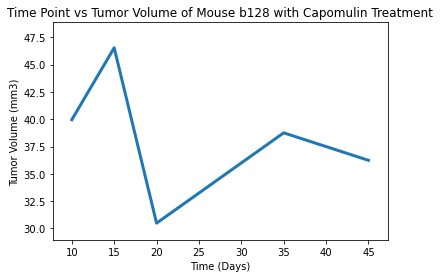

In [22]:
# Isolate columns of single mouse (b128)

capomulin_b128_df = capomulin_df.groupby(['Timepoint']).agg(Tum_Vol_Avg=('Tumor Volume (mm3)', np.mean),\
                                                            ).round(3)


# Set the index of capomulin_b128_df

# Generate a line plot of time point versus tumor volume for a mouse (b128) treated with Capomulin
 
x_time_points = list(capomulin_b128_df.index.values)

plt.plot(
    x_time_points,
    capomulin_b128_df['Tum_Vol_Avg'],
    label="Timepoints",
    linewidth=3  
    )

# Add the descriptive title, x labels and y labels
plt.title("Time Point vs Tumor Volume of Mouse b128 with Capomulin Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.xlim(min(x_time_points)-max(x_time_points)*0.05, max(x_time_points)*1.05)
plt.ylim(min(capomulin_b128_df['Tum_Vol_Avg'])*0.95, max(capomulin_b128_df['Tum_Vol_Avg'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]





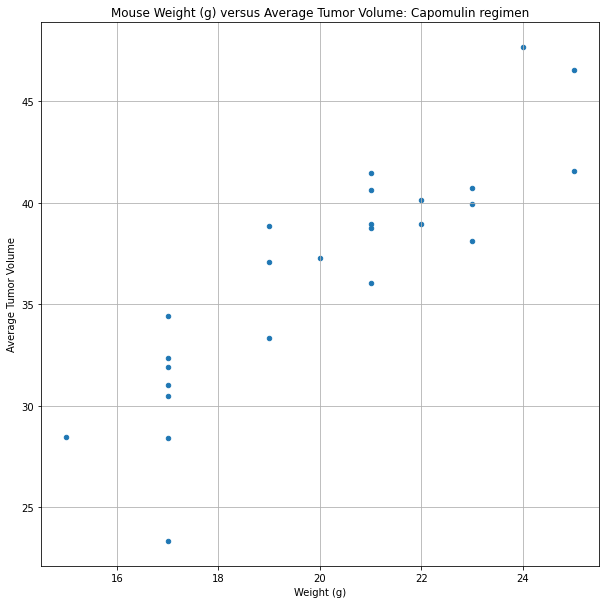

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.head()

# Isolate columns of Capomulin
capomulin_filtered_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]


capomulin_filtered_df.head()

# Calculate the average tumor volume per mouse and weight with drug regimen = Capomulin
capomulin_mean = pd.DataFrame(capomulin_filtered_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Rename tumor volume column to Average Tumor Volume
capomulin_mean = capomulin_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
capomulin_mean.head()

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mean = capomulin_mean.set_index('Mouse ID')

capomulin_mean.plot(kind = "scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(10,10), 
                    title="Mouse Weight (g) versus Average Tumor Volume: Capomulin regimen")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.88.


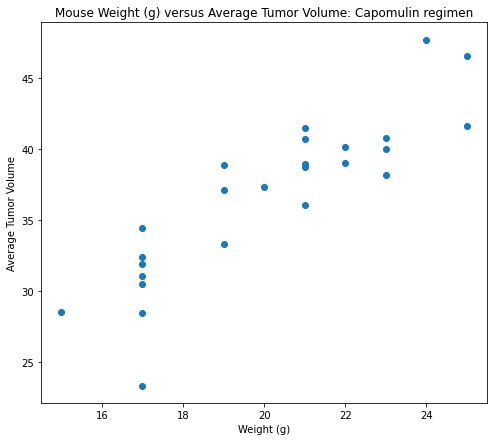

Predicted y is 39.95844798964198 vs an actual value of 38.98287774
The r-squared is: 0.7686134812139


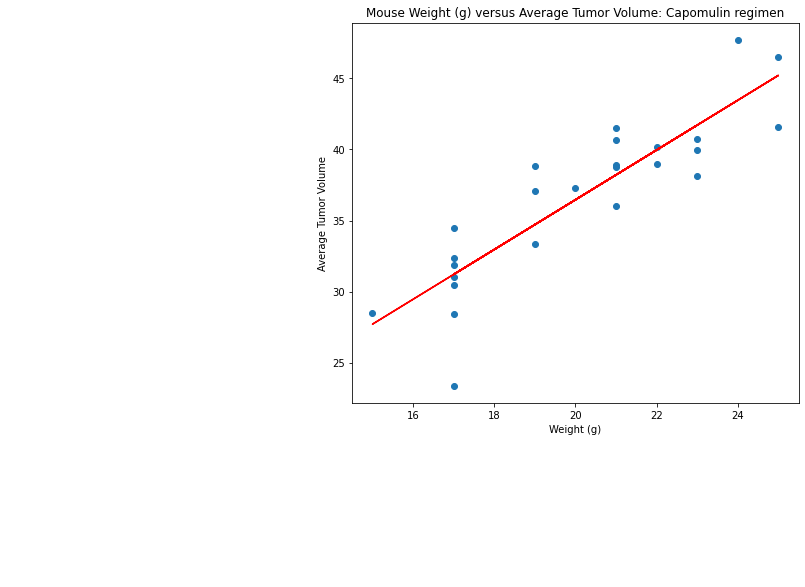

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Isolate mouse weight and average tumor volume
mouse_weight = capomulin_mean.iloc[:,0]
average_tumor_volume = capomulin_mean.iloc[:,1]

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

# Create beginning steps for linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume: Capomulin regimen")
plt.show()

# Add the linear regression equation and line to plot
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Check x values
x_values

# y=mx+b
y=slope*x_values[0]+intercept
print(f'Predicted y is {y} vs an actual value of {y_values[0]}')

# Calculate regress values, r-squared, etc
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=18,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume: Capomulin regimen")
print(f"The r-squared is: {rvalue**2}")
plt.show()